<a href="https://colab.research.google.com/github/arkothiwala/Analytics-Vidhya/blob/master/AV_GoD_FastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import torch
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1zRzgwnzMs52MN674v6TFDOMrKi1jg6dN' #File ID for the required Trainingdata
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('train-ship classification.zip')

In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1B2QDCOTjkvMJ0O5xi37VQR6EecSeOWU2' #File ID for the required Trainingdata
downloaded = drive.CreateFile({'id': file_id})
#downloaded.GetContentFile('test-ship classification.csv')
downloaded.GetContentFile('./data/test.csv')

In [0]:
import zipfile
zip_ref = zipfile.ZipFile('train-ship classification.zip', 'r')
zip_ref.extractall('data')
zip_ref.close()

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
import fastai

In [0]:
train_list = pd.read_csv("./data/train.csv").image.values.tolist()
test_list = pd.read_csv("./data/test.csv").image.values.tolist()

In [0]:
from shutil import copy2
os.mkdir('./train')
os.mkdir('./test')
for image_path in train_list:
    copy2('./data/images/' + image_path, './train/')

for image_path in test_list:
    copy2('./data/images/' + image_path, './test/')

In [0]:
#batch size
bs = 64

In [0]:
path_img = './data/images'
fnames = get_image_files(path_img)

In [41]:
fnames[:5]

[PosixPath('data/images/2856537.jpg'),
 PosixPath('data/images/2837550.jpg'),
 PosixPath('data/images/2874118.jpg'),
 PosixPath('data/images/1384029.jpg'),
 PosixPath('data/images/2670213.jpg')]

In [0]:
data = ImageDataBunch.from_csv(path_img, ds_tfms=get_transforms(), csv_labels='../train.csv', size=150, bs=bs).normalize(imagenet_stats)

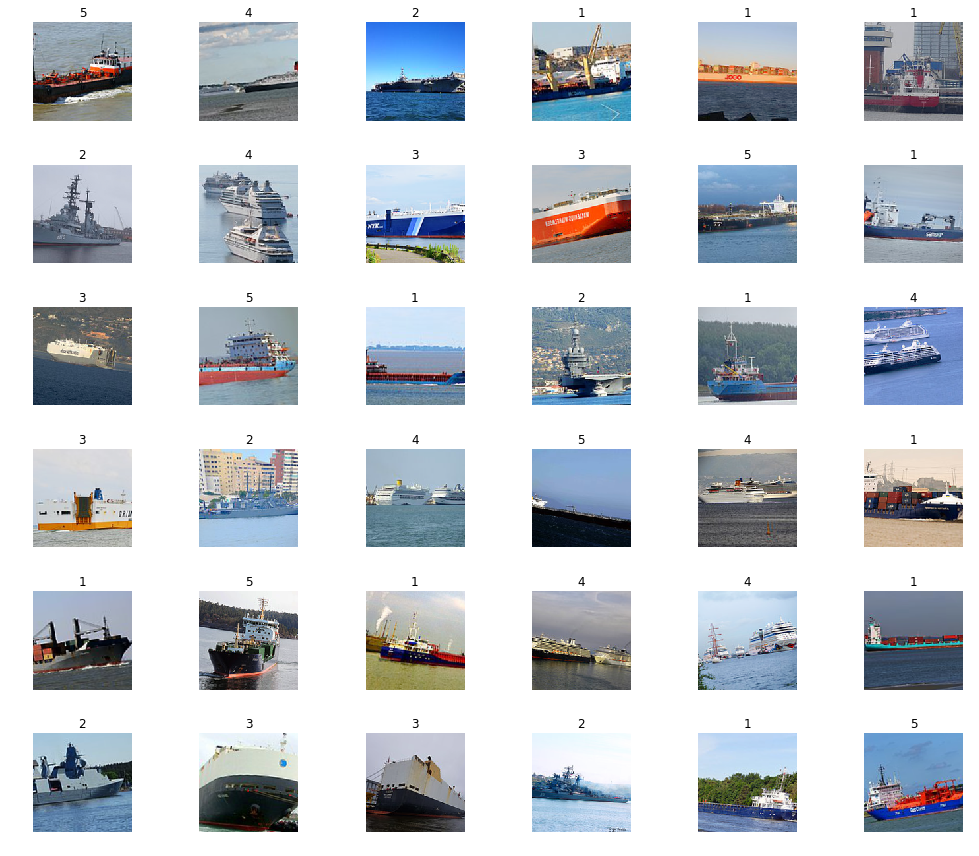

In [10]:
data.show_batch(rows=6, figsize=(14,12))

###Modelling

In [11]:
data.classes

[1, 2, 3, 4, 5]

In [12]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 95589866.76it/s]


In [13]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.042244,0.601897,0.230400,00:30
1,0.712640,0.488002,0.197600,00:30
2,0.552419,0.430528,0.176000,00:30
3,0.475298,0.425981,0.161600,00:29


In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.461223,0.430282,0.168800,00:29
1,0.465409,0.391207,0.144800,00:29
2,0.406366,0.373533,0.146400,00:28
3,0.370314,0.368064,0.148000,00:29


In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.368433,0.380439,0.148800,00:28
1,0.386720,0.339358,0.128000,00:28
2,0.338916,0.335986,0.132000,00:28
3,0.319385,0.334037,0.124800,00:28


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

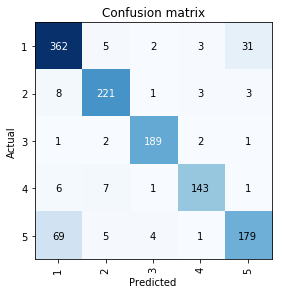

In [18]:
interp.plot_confusion_matrix()

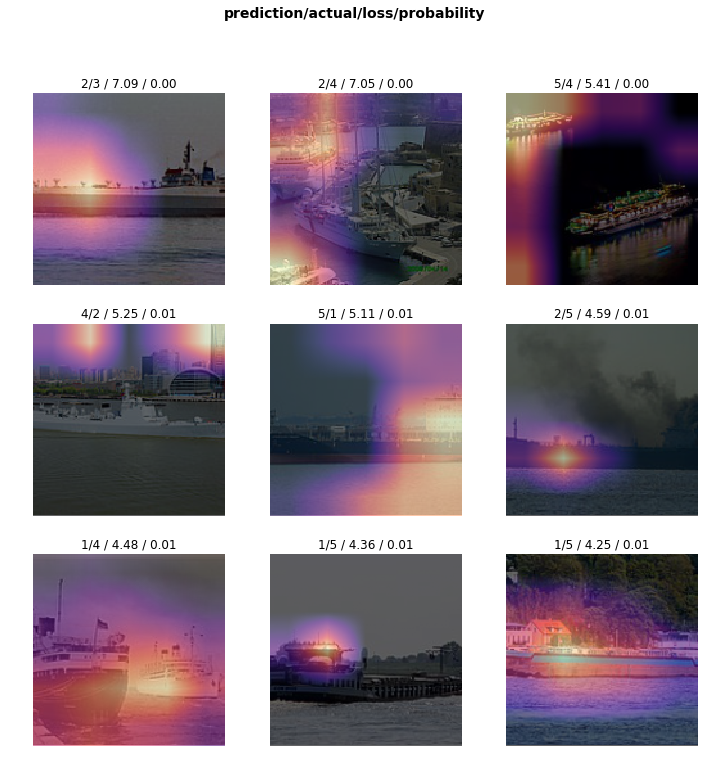

In [43]:
interp.plot_top_losses(9)

In [20]:
interp.y_true

tensor([4, 0, 1,  ..., 2, 2, 0])

In [0]:
help(ImageDataBunch.from_df)

Help on method from_df in module fastai.vision.data:

from_df(path:Union[pathlib.Path, str], df:pandas.core.frame.DataFrame, folder:Union[pathlib.Path, str]='.', label_delim:str=None, valid_pct:float=0.2, fn_col:Union[int, Collection[int], str, Collection[str]]=0, label_col:Union[int, Collection[int], str, Collection[str]]=1, suffix:str='', **kwargs:Any) -> 'ImageDataBunch' method of builtins.type instance
    Create from a `DataFrame` `df`.



In [46]:
DatasetType.Test

<DatasetType.Test: 3>

In [44]:
#learn.predict(is_test=True)
learn.get_preds(ds_type=DatasetType.Test)

AttributeError: ignored

In [0]:
import pandas
test_df = pandas.read_csv('test.csv')
test_df['Class'] = 0
test_data = ImageDataBunch.from_df(path_img, valid_pct=0, df=test_df, ds_tfms=get_transforms(), size=150,  bs=bs).normalize(imagenet_stats)
assert (len(test_df) == len(test_data.train_ds)), 'Dimention Mismatch between ImageDataBunch size: {} and test dataframe size: {}, check validation split'.format(len(test_df), len(test_data.train_ds))

In [0]:
len(test_data.train_ds)

7301

In [0]:
learn.predict(test_data.train_ds.x)

AttributeError: ignored